In [139]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [140]:
%run proj1_helpers.py
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Cleaning the data
We see that the column 22 can be used to make categories, since the values of some other columns seems to be proportional to the value of this column.

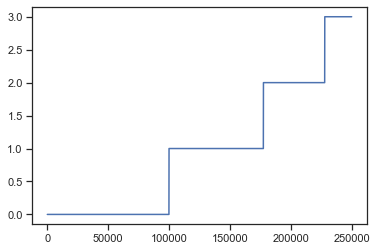

In [141]:
# categorical column
plt.plot(np.sort(tX[:,22]))
tx = tX.copy()

In [142]:
# split data into 4 different catagories

Indices0 = tx[:,22]==0
x0 = tx[np.where(Indices0)]

Indices1 = tx[:,22]==1
x1 = tx[np.where(Indices1)]

Indices2 = tx[:,22]==2
x2 = tx[np.where(Indices2)]

Indices3 = tx[:,22]==3
x3 = tx[np.where(Indices3)]

In [143]:
# set the -999 to the median of the column

x0 = np.where(x0==-999, np.nan, x0)
col_median = np.nanmedian(x0, axis=0)
inds_nan = np.where(np.isnan(x0))
x0[inds_nan] = np.take(col_median, inds_nan[1])

x1 = np.where(x1==-999, np.nan, x1)
col_median = np.nanmedian(x1, axis=0)
inds_nan = np.where(np.isnan(x1))
x1[inds_nan] = np.take(col_median, inds_nan[1])

x2 = np.where(x2==-999, np.nan, x2)
col_median = np.nanmedian(x2, axis=0)
inds_nan = np.where(np.isnan(x2))
x2[inds_nan] = np.take(col_median, inds_nan[1])

x3 = np.where(x3==-999, np.nan, x3)
col_median = np.nanmedian(x3, axis=0)
inds_nan = np.where(np.isnan(x3))
x3[inds_nan] = np.take(col_median, inds_nan[1])


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:959: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


In [144]:
# remove the nan columns

x0 = x0[:,~np.all(np.isnan(x0), axis=0)]
x1 = x1[:,~np.all(np.isnan(x1), axis=0)]
x2 = x2[:,~np.all(np.isnan(x2), axis=0)]
x3 = x3[:,~np.all(np.isnan(x3), axis=0)]

In [145]:
print(x0.shape)
print(x1.shape)
print(x2.shape)
print(x3.shape)

(99913, 20)
(77544, 23)
(50379, 30)
(22164, 30)


In [146]:
# normalize the datasets

minmax = dataset_minmax(x0)
x0_normalized = np.copy(x0)
normalize_dataset(x0_normalized, minmax)

minmax = dataset_minmax(x1)
x1_normalized = np.copy(x1)
normalize_dataset(x1_normalized, minmax)

minmax = dataset_minmax(x2)
x2_normalized = np.copy(x2)
normalize_dataset(x2_normalized, minmax)

minmax = dataset_minmax(x3)
x3_normalized = np.copy(x3)
normalize_dataset(x3_normalized, minmax)

In [147]:
# Remove the 0 columns

idx = np.argwhere(np.all(x0[..., :] == 0, axis=0))
x0 = np.delete(x0, idx, axis=1)

idx = np.argwhere(np.all(x1[..., :] == 0, axis=0))
x1 = np.delete(x1, idx, axis=1)

idx = np.argwhere(np.all(x2[..., :] == 0, axis=0))
x2 = np.delete(x2, idx, axis=1)

idx = np.argwhere(np.all(x3[..., :] == 0, axis=0))
x3 = np.delete(x3, idx, axis=1)


In [148]:
x0 = np.insert(x0, 0, 1, axis=1)
x1 = np.insert(x1, 0, 1, axis=1)
x2 = np.insert(x2, 0, 1, axis=1)
x3 = np.insert(x3, 0, 1, axis=1)

In [149]:
print(x0.shape)
print(x1.shape)
print(x2.shape)
print(x3.shape)

(99913, 19)
(77544, 24)
(50379, 31)
(22164, 31)


In [150]:
y0 = y[Indices0]
y1 = y[Indices1]
y2 = y[Indices2]
y3 = y[Indices3]

In [151]:
print(y0.shape)
print(y1.shape)
print(y2.shape)
print(y3.shape)

(99913,)
(77544,)
(50379,)
(22164,)


## Test on different models

In [176]:
%run implementations.py

In [66]:
n0 = x0.shape[1]
weights_LS0 = least_squares_SGD(y0, x0, np.zeros(n0), 100, 0.000001)[1]
cat_accuracy_train, f1_score_train = metrics(weights_LS0,y0,x0)
print("Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)

Categorical accuracy train :  0.8100947824607408  || f1_score train:  0.22805306281701132


In [118]:
weights_LS1 = least_squares_GD(y1, x1, np.zeros(x1.shape[1]), 5000, 0.000001)[1]
cat_accuracy_train, f1_score_train = metrics(weights_LS1,y1,x1)
print("Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)

Categorical accuracy train :  0.6859847312493552  || f1_score train:  0.26231932773109246


In [88]:
weights_LS2 = least_squares_GD(y2, x2, np.zeros(x2.shape[1]), 1000, 0.000001)[1]
cat_accuracy_train, f1_score_train = metrics(weights_LS2,y2,x2)
print("Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)

Categorical accuracy train :  0.7079140117906271  || f1_score train:  0.5066473003216196


In [179]:
weights_LS3 = least_squares_GD(y3, x3, np.zeros(x3.shape[1]), 1000, 0.000001)[1]
cat_accuracy_train, f1_score_train = metrics(weights_LS3,y3,x3)
print("Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)

Categorical accuracy train :  0.7148980328460567  || f1_score train:  0.1030469017459774


## Generate predictions and save ouput in csv format for submission:

In [29]:
DATA_TEST_PATH = 'test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [30]:
# split data into 4 different catagories

Indices0 = tX_test[:,22]==0
x0_test = tX_test[np.where(Indices0)]

Indices1 = tX_test[:,22]==1
x1_test = tX_test[np.where(Indices1)]

Indices2 = tX_test[:,22]==2
x2_test = tX_test[np.where(Indices2)]

Indices3 = tX_test[:,22]==3
x3_test = tX_test[np.where(Indices3)]

# set the -999 to the median of the column

x0_test = np.where(x0_test==-999, np.nan, x0_test)
col_median = np.nanmedian(x0_test, axis=0)
inds_nan = np.where(np.isnan(x0_test))
x0_test[inds_nan] = np.take(col_median, inds_nan[1])

x1_test = np.where(x1_test==-999, np.nan, x1_test)
col_median = np.nanmedian(x1_test, axis=0)
inds_nan = np.where(np.isnan(x1_test))
x1_test[inds_nan] = np.take(col_median, inds_nan[1])

x2_test = np.where(x2_test==-999, np.nan, x2_test)
col_median = np.nanmedian(x2_test, axis=0)
inds_nan = np.where(np.isnan(x2_test))
x2_test[inds_nan] = np.take(col_median, inds_nan[1])

x3_test = np.where(x3_test==-999, np.nan, x3_test)
col_median = np.nanmedian(x3_test, axis=0)
inds_nan = np.where(np.isnan(x3_test))
x3_test[inds_nan] = np.take(col_median, inds_nan[1])

# remove the nan collumns

x0_test = x0_test[:,~np.all(np.isnan(x0_test), axis=0)]
x1_test = x1_test[:,~np.all(np.isnan(x1_test), axis=0)]
x2_test = x2_test[:,~np.all(np.isnan(x2_test), axis=0)]
x3_test = x3_test[:,~np.all(np.isnan(x3_test), axis=0)]

# normalize the datasets

minmax = dataset_minmax(x0_test)
x0_normalized_test = np.copy(x0_test)
normalize_dataset(x0_normalized_test, minmax)

minmax = dataset_minmax(x1_test)
x1_normalized_test = np.copy(x1_test)
normalize_dataset(x1_normalized_test, minmax)

minmax = dataset_minmax(x2_test)
x2_normalized_test = np.copy(x2_test)
normalize_dataset(x2_normalized_test, minmax)

minmax = dataset_minmax(x3_test)
x3_normalized_test = np.copy(x3_test)
normalize_dataset(x3_normalized_test, minmax)

x0_test = x0_test[:,:-2] #Why?

In [31]:
print(x0_test.shape)
print(x1_test.shape)
print(x2_test.shape)
print(x3_test.shape)

(227458, 18)
(175338, 23)
(114648, 30)
(50794, 30)


In [34]:
x0_test = np.insert(x0_test, 0, 1, axis=1)
x1_test = np.insert(x1_test, 0, 1, axis=1)
x2_test = np.insert(x2_test, 0, 1, axis=1)
x3_test = np.insert(x3_test, 0, 1, axis=1)

In [35]:
y_pred0 = predict_labels(weights_LS0, x0_test)
y_pred1 = predict_labels(weights_LS1, x1_test)
y_pred2 = predict_labels(weights_LS2, x2_test)
y_pred3 = predict_labels(weights_LS3, x3_test)

In [36]:
total_length = y_pred0.shape[0] + y_pred1.shape[0] + y_pred2.shape[0] + y_pred3.shape[0] 
y_pred = np.zeros((total_length,))
y_pred[Indices0==1] = y_pred0
y_pred[Indices1==1] = y_pred1
y_pred[Indices2==1] = y_pred2
y_pred[Indices3==1] = y_pred3

In [37]:
y_pred

array([-1., -1., -1., ...,  1., -1., -1.])

In [38]:
time_day = datetime.datetime.now().day
time_hour = datetime.datetime.now().hour
time_min = datetime.datetime.now().minute
time_second = datetime.datetime.now().second

time = str(time_day)+"-"+str(time_hour)+"-"+str(time_min)+"-"+str(time_second)

OUTPUT_PATH = 'submission'+"_"+str(time)+".csv"
#print(weights_LS.shape)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [39]:
#TO DO: 
# use better algorithm than simple Least Squares and ridge regression